<a href="https://colab.research.google.com/github/piziomo/Machine-Learning/blob/main/Gradient%20Descent/Coding_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

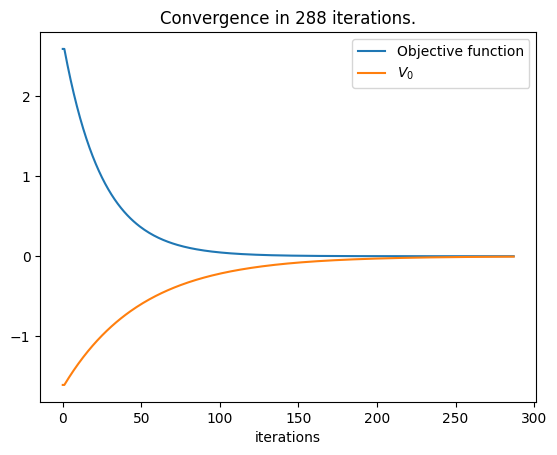

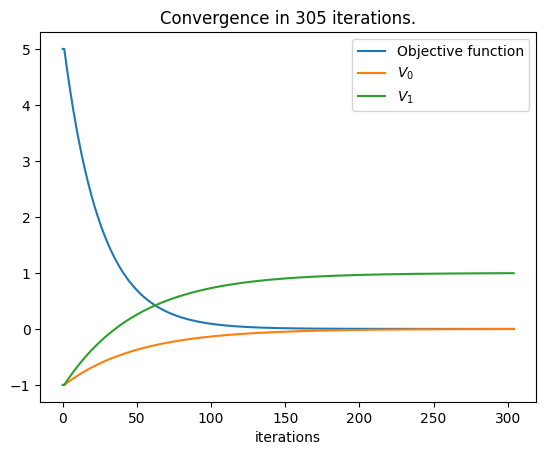

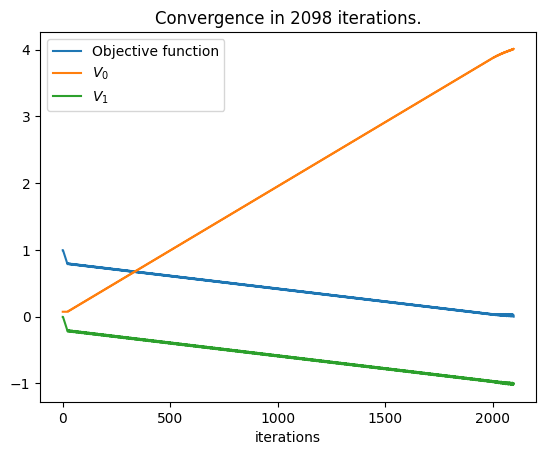

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def gd(f,df,v0=0.0,lr = 0.01,eps=1e-4,nmax=1000, history = True):
    """
    Gradient descent optimization algorithm.

    Parameters:
    f (callable): The objective function to be minimized.
                  It should take a single argument and return a scalar value.
    df (callable): The gradient of the objective function.
                   It should take a single argument and return the gradient as a scalar or numpy array.
    v0 (float or numpy.ndarray): Initial starting point for the gradient descent algorithm.
                                 Default is 0.0. Can be a scalar or numpy array for multi-dimensional inputs.
    lr (float): Learning rate, determining the step size at each iteration. Default is 0.01.
    eps (float): Convergence criterion. The algorithm stops if the step size is smaller than eps. Default is 1e-4.
    nmax (int): Maximum number of iterations. Default is 1000.
    history (bool): If True, the function returns the history of optimization steps. Default is True.

    Returns:
    tuple: Contains the optimal value, a boolean indicating convergence, and the history of iterations.
           The history is returned as a tuple of numpy arrays representing the variable values and function values.
    """
    Hv,Hf = [],[]
    v = v0
    if history:
        Hv.append(v)
        Hf.append(f(v))
    for i in range(nmax):
        dv = -lr*df(v) #gradient step

        if history:
            Hv.append(v)
            Hf.append(f(v))
        if np.linalg.norm(dv)<eps: # if the step taken is too small, we have converged
            break
        #import pdb; pdb.set_trace()
        v = v+dv #gradient update
    converged = np.linalg.norm(dv)<eps
    return v,converged,(np.array(Hv),np.array(Hf))

def plotGD(H,c):
    """
    Plot the optimization steps of the gradient descent algorithm.

    Parameters:
    H (tuple of numpy.ndarray): History of iterations as returned by the gd function.
                                It contains variable values and function values at each step.
    c (bool): Convergence status as returned by the gd function.


    This function generates a plot of the optimization steps.
    """
    plt.figure()
    Hv,Hf = H
    if Hv.ndim == 1:
        Hv = np.atleast_2d(Hv).T

    plt.plot(Hf);plt.plot(Hv)
    plt.xlabel('iterations');plt.legend(['Objective function']+['$V_'+str(i)+'$' for i in range(Hv.shape[1])])
    str_title = 'Convergence in '+str(len(Hf))+' iterations.'
    if not c: str_title = 'No '+str_title
    plt.title(str_title)
if __name__=='__main__':

    #%% Single input variable


    # Define the function f which is the objective function to be minimized.
    # In this case, f is a simple quadratic function.
    def f(v):
        return v**2

    # Define the derivative of the function f, denoted as df.
    # This is required for the gradient descent algorithm to determine the direction of the steepest descent.
    def df(v):
        return 2*v

    # Generate an array of values from -3 to 3, divided into 1000 intervals.
    # This array represents the range of values over which we want to optimize the function.
    v = np.linspace(-3, 3, 1000)

    # Select a random initial point within the range of v for the gradient descent to start.
    # This adds some randomness to the starting point of the optimization.
    v0 = np.min(v) + (np.max(v) - np.min(v)) * np.random.rand()

    # Call the gradient descent function 'gd' with the function f, its derivative df, and other parameters.
    # v0: initial point, lr: learning rate, eps: convergence criterion, nmax: max iterations, history: store optimization steps.
    vout, c, H = gd(f, df, v0=v0, lr=0.01, eps=1e-4, nmax=1000, history=True)

    # Plot the gradient descent progress using the 'plotGD' function.
    # It visualizes the optimization steps and the convergence of the algorithm.
    plotGD(H, c)

    #%% Two variable function
    # Section for handling a two-variable optimization function

    # Define a two-variable objective function 'f'.
    # Here, 'f' is a simple quadratic function in two variables.
    def f(v):
        # v is expected to be a vector (or list) of two elements.
        return np.array(v[0]**2 + (v[1]-1)**2)

    # Define the gradient 'df' of the objective function 'f'.
    # The gradient function returns a vector of partial derivatives.
    def df(v):
        # Returns the gradient of 'f' as a numpy array.
        return np.array([2*v[0], 2*(v[1]-1)])

    # Create a range of values for testing or visualization purposes.
    # This is not directly used in the gradient descent for this 2-variable function.
    v = np.linspace(-3, 3, 1000)

    # Select a random initial point in 2D space for the gradient descent to start.
    # This initial point is set to [-1.0, -1.0] in this case, but can be randomized or modified.
    v0 = np.array([-1.0, -1.0])

    # Perform the gradient descent optimization using the two-variable function 'f' and its gradient 'df'.
    # The optimization will start from 'v0' and use the specified learning rate 'lr', convergence criterion 'eps',
    # maximum number of iterations 'nmax', and it will store the history of optimization if 'history' is True.
    vout, c, H = gd(f, df, v0=v0, lr=0.01, eps=1e-4, nmax=1000, history=True)

    # Plot the gradient descent progress for the two-variable function.
    # This visualizes how the optimization algorithm progresses over iterations.
    plotGD(H, c)


    #%% Implementation of a very simple perceptron using the gradient descent function

    # Implementation of a simple perceptron using the gradient descent function

    # X: Feature data, a 2D numpy array where each row represents a data point, and each column a feature.
    # In this case, two data points with two features each.
    X = np.array([[1, 3], [1, 5]])

    # Y: Labels for the data points. Here, two labels (1 and -1).
    Y = np.array([1, -1])

    # Define the hinge loss function for a given data point (x, y) and weights w.
    # Hinge loss is max(0, 1 - y * (w @ x)).
    # Mathematically, L(y, w @ x) = max(0, 1 - y * (w @ x)).
    def loss(y, x, w):
        return max(0.0, 1 - y * (w @ x))

    # Define the average loss across all data points for given weights w.
    # This is the objective function to be minimized in gradient descent.
    # Mathematically, L(w) = 1/N * Σ max(0, 1 - Yi * (w @ Xi)).
    def loss_w(w):
        return np.mean([loss(Y[i], X[i], w) for i in range(len(Y))])

    # Define the derivative of the hinge loss function with respect to weights w for a given (x, y).
    # The gradient is -y * x if 1 - y * (w @ x) > 0, else 0.
    # Mathematically, dL(y, w @ x)/dw = -y * x if 1 - y * (w @ x) > 0, else 0.
    def dloss(y, x, w):
        if (1 - y * (w @ x)) <= 0:
            return np.zeros(x.shape)
        else:
            return -y * x

    # Define the average gradient of the loss function across all data points for weights w.
    # This function is used in gradient descent to update weights.
    # Mathematically, dL(w)/dw = 1/N * Σ dL(Yi, w @ Xi)/dw.
    def dloss_w(w):
        return np.mean([dloss(Y[i], X[i], w) for i in range(len(Y))], axis=0)

    # Assign the loss function and its derivative to variables for convenience.
    f = loss_w
    df = dloss_w

    # Initialize weights (w) randomly. Here, w is a 2-element vector for two features.
    v0 = 0.1 * np.random.randn(X.shape[1])

    # Apply gradient descent to minimize the loss function and find the optimal weights.
    vout, c, H = gd(f, df, v0=v0, lr=0.01, eps=1e-4, nmax=10000, history=True)

    # Plot the optimization process for each weight separately.
    # First plot is for the bias term, and the second plot is for the weight associated with the feature.
    plotGD(H, c)